---
layout: post
title:  "Random Forest"
date:   2023-03-06 10:14:54 +0700
categories: jekyll update
---

# TOC
- [Voting](#vote)
- [Bagging](#bag)
- [Definition](#define)
- [Code example](#code)

Random forest is a group of decision trees. How exactly are they grouped? Let's examine.

# Voting

When we have several predictors, we can combine them by taking the majority of the votes. This is called hard voting. As usual, soft voting is to take the probability of each class. If the task is a regression one, we average the predicted values of all predictors. The principle behind this technique is called wisdom of the crowd. Which means that, even though separate predictors in the group are weak learners (they predict with low confidence), together they turn out to represent a strong learner.

# Bagging

When we want to use the same predictor, we can sampling the training set to create multiple training sets for that predictor to train on. There are two methods of sampling: with and without replacement. Sampling with replacement means that after each draw of a data point, we replace it in the original set so that the probabilities of getting those points don't change. In this way, the same instance can be drawed multiple time. This is call bootstrap aggregating (shorted as bagging). When we sample without replacement, after each draw of the data point, we don't put anything back, hence the probabilities of those data points in the original set changes. In this way, each instance can only be sampled once. This is call pasting.

So how does this sampling method predict? We gather all the predictions from the above sampling method and then choose the most frequent (i.e. mode) for class and average for value. This is same as voting mechanism above.

With bagging, there is a small note to take. Since we sample with replacement, some instance would be sampled several times while some others are left untouched. When we want to curate a new training set with the same size as before by repeatedly taking randomly from that original training set, only 63% of that set are chosen. That 37% left untouched are called out of bag evaluation. Those data points can be considered as a holdout set for validation. Note that if we do the sampling multiple times to create many training sets, those untouched points are not necessarily the same.

# Definition

Random forest is a group of decision trees, using bagging method, with sampling set size equal the size of the original training set. This group method is also called ensemble. Random forest doesn't just randomize the training set, it also randomizes the features for each predictors. This allows it to calculate the feature importance for each feature by averaging the impurity reduction that feature produces across all trees in the forest. The weight is the number of training data points.

# Code example

Let's examine one of the famous dataset in machine learning: the MNIST - hand written number dataset (we plot some of those images). When initialize the model, set oob_score=True to calculate the out of bag score. If everything is okay this number would be close to the accuracy score. It is like an early test for overfitting.

As a usual practice, check the confusion matrix. The most off prediction that the model made is when it predicts number 4 to be number 9: according to the confusion matrix, there are 26 instances in that misclassifcation act.

A good thing about random forest in sklearn is that it provides the feature importance. That indicator provides lots of insight into the data. In our case of the handwritten data set, our intution shows that mostly our eyes focus to the center of the image to see what number that is. The pixels in the outer region are not really that important. When we plot the feature importance weight of all the images in the training set, it confirms our intution: the picture is lit up in the middle.


In [23]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

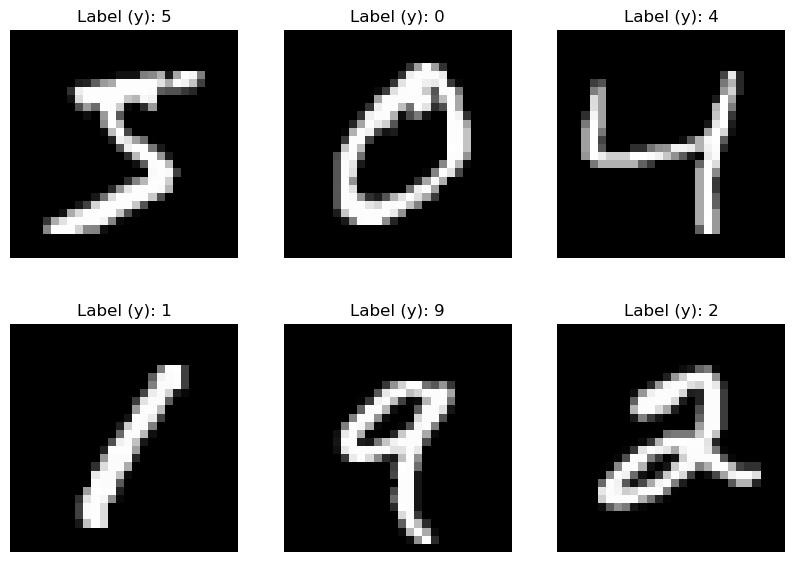

In [27]:
fig = plt.figure(figsize=(10,7))
for i in range(6):  
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(X_mnist[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_mnist[i]))
    plt.axis('off')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=2)

In [17]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [18]:
rnd_clf.oob_score_

0.9650892857142858

In [20]:
y_pred = rnd_clf.predict(X_test)

Accuracy: 97.16%


Text(0.5, 1.0, 'Confusion Matrix')

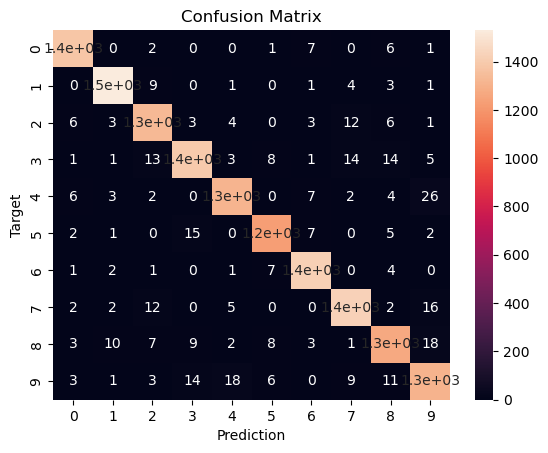

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

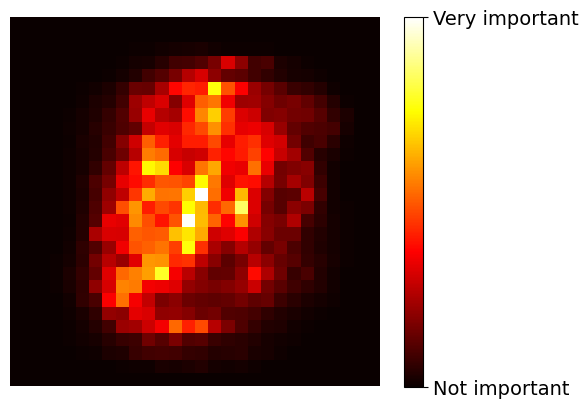

In [10]:
heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
plt.show()